In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

import os
import random

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Set seed for reproducibility
seed = 123

# Create the train dataset with a validation split
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/Kidney dataset/Kidney Dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
    validation_split=0.2,
    subset='training',
    seed=seed
)

# Create the validation (test) dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory=r'/content/drive/MyDrive/Kidney dataset/Kidney Dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=seed
)

Found 12455 files belonging to 4 classes.
Using 9964 files for training.
Found 12455 files belonging to 4 classes.
Using 2491 files for validation.


In [10]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

CYST


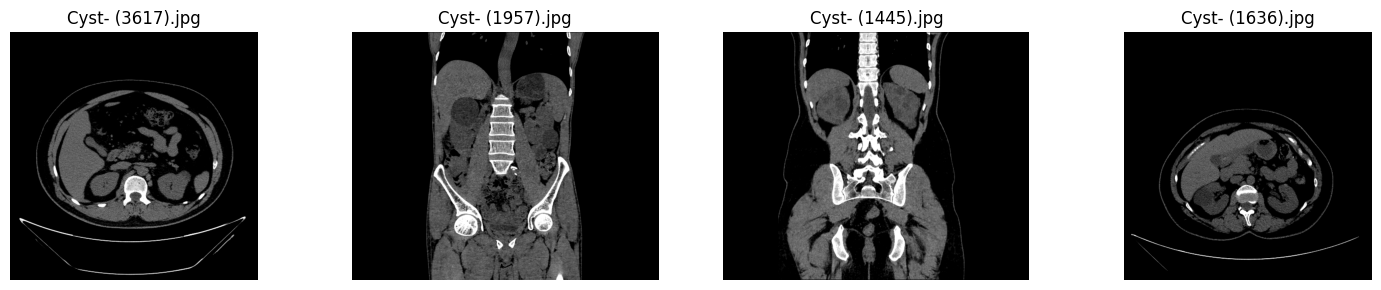

NORMAL


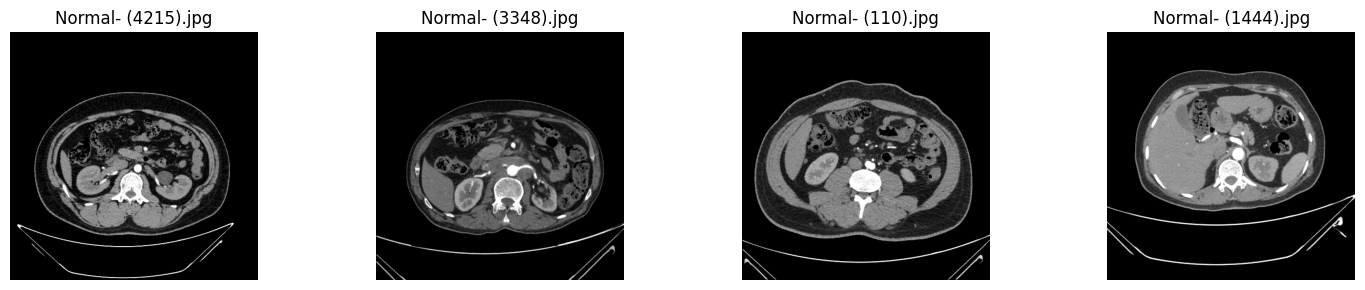

STONE


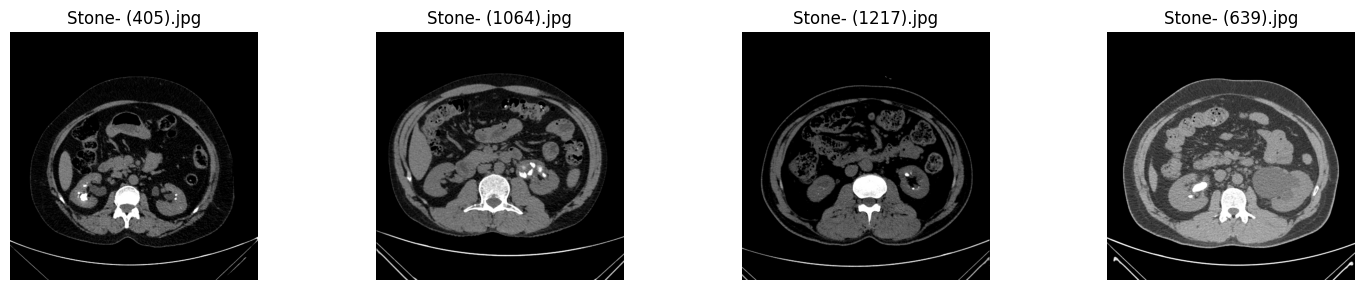

TUMOR


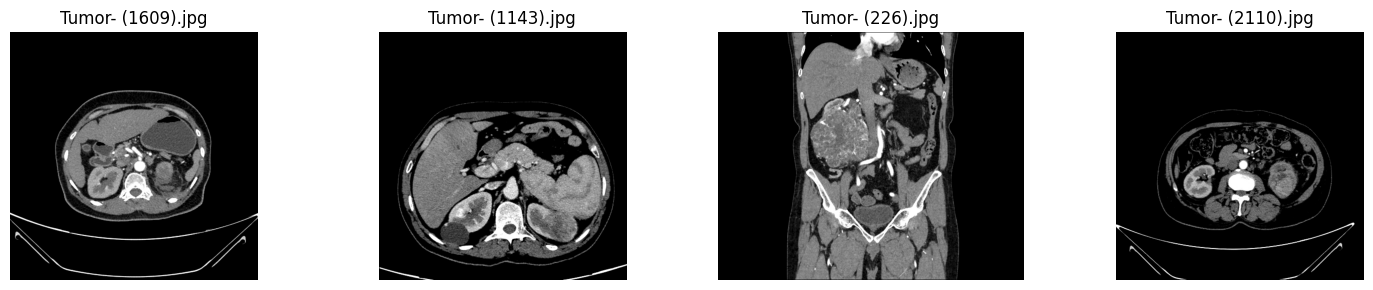

In [11]:
# Extrating the class labels
classes = train_ds.class_names

# Iterating through each class to plot its images
for label in classes:

    # Specify the path containing the images to visualize
    path_to_visualize = f"/content/drive/MyDrive/Kidney dataset/Kidney Dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/{label}"

    # Visualize 3 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)



In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(4, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      15,745,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,767,076 (60.15 MB)

 Trainable params: 15,766,884 (60.15 MB)

 Non-trainable params: 192 (768.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, epochs=3, validation_data=test_ds, verbose=1)

Epoch 1/3
156/156 ━━━━━━━━━━━━━━━━━━━━ 2399s 15s/step - accuracy: 0.8132 - loss: 3.8203 - val_accuracy: 0.9366 - val_loss: 0.3093
Epoch 2/3
156/156 ━━━━━━━━━━━━━━━━━━━━ 1431s 9s/step - accuracy: 0.9685 - loss: 0.2512 - val_accuracy: 0.9932 - val_loss: 0.0206
Epoch 3/3
156/156 ━━━━━━━━━━━━━━━━━━━━ 1489s 9s/step - accuracy: 0.9833 - loss: 0.1729 - val_accuracy: 0.9888 - val_loss: 0.0771


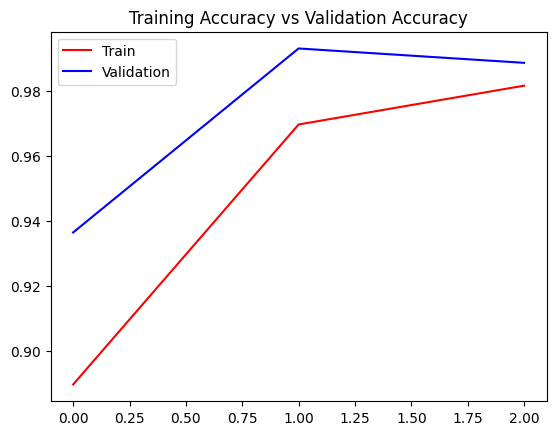

In [17]:
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

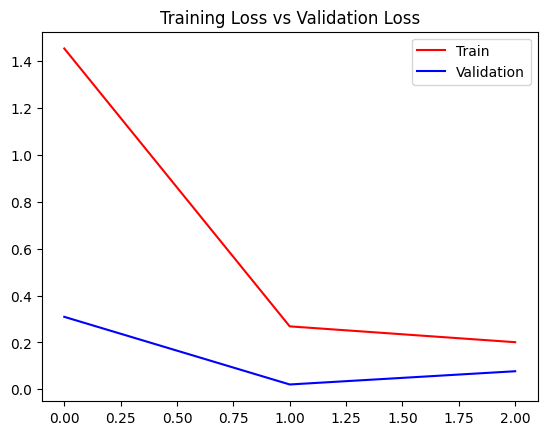

In [18]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
# Function to calculate PSNR
def calculate_psnr(true_image, pred_image):
    mse = np.mean((true_image - pred_image) ** 2)
    if mse == 0:
        return 100
    max_pixel = 1.0  # Assuming normalized pixel values
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [21]:
# Evaluate model on test dataset and get predictions
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 690ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 729ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 696ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 721ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 746ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 737ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 927ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 873ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 896ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 811ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 884ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 996ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 932ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 723ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 730ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step
2/2 ━━━

In [22]:
# Calculate metrics
conf_matrix = confusion_matrix(y_true, y_pred)
classification_metrics = classification_report(y_true, y_pred, target_names=train_ds.class_names, output_dict=True)

precision = classification_metrics['weighted avg']['precision']
recall = classification_metrics['weighted avg']['recall']
f1_score = classification_metrics['weighted avg']['f1-score']
accuracy = classification_metrics['accuracy']
auc_score = roc_auc_score(tf.keras.utils.to_categorical(y_true, num_classes=len(train_ds.class_names)),
                          tf.keras.utils.to_categorical(y_pred, num_classes=len(train_ds.class_names)))

# Sensitivity for each class (recall for individual classes)
sensitivity_per_class = [conf_matrix[i, i] / np.sum(conf_matrix[i, :]) for i in range(len(train_ds.class_names))]

In [23]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print(f"AUC: {auc_score}")
print(f"Sensitivity (per class): {sensitivity_per_class}")

Accuracy: 0.9887595343235648
Precision: 0.9887547113021876
Recall: 0.9887595343235648
F1-score: 0.9887536839265
AUC: 0.9920033915558943
Sensitivity (per class): [0.994572591587517, 0.99, 0.9929328621908127, 0.9745222929936306]


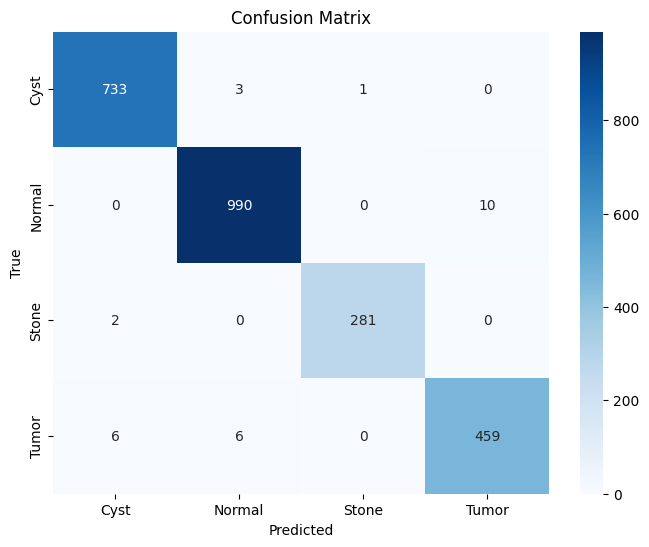

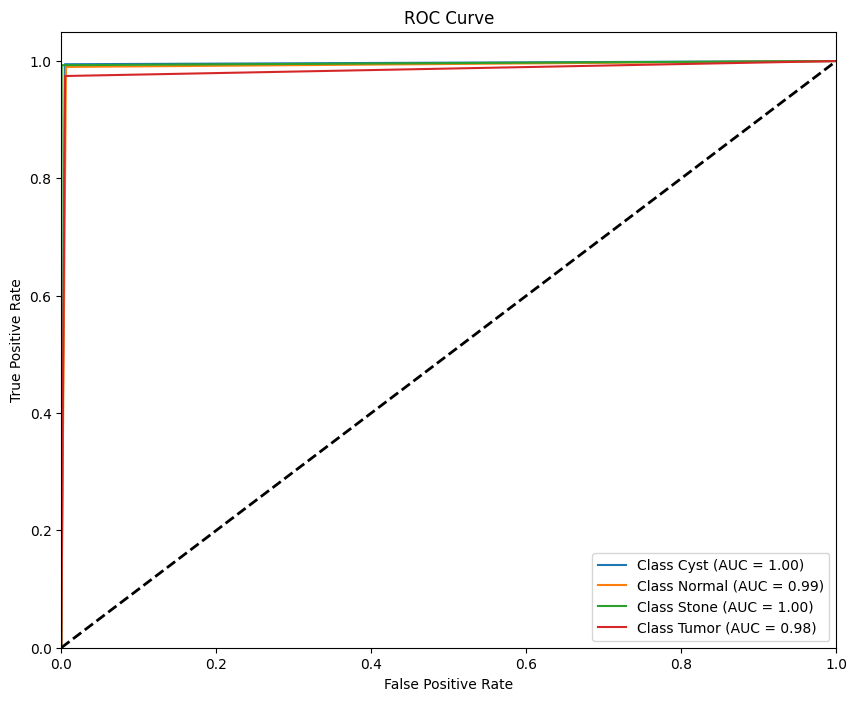

In [25]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot ROC curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(train_ds.class_names)):
    fpr[i], tpr[i], _ = roc_curve(tf.keras.utils.to_categorical(y_true, num_classes=len(train_ds.class_names))[:, i],
                                  tf.keras.utils.to_categorical(y_pred, num_classes=len(train_ds.class_names))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(train_ds.class_names)):
    plt.plot(fpr[i], tpr[i], label=f'Class {train_ds.class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

